# Stato dei pazienti in Italia
Andamento dello stato dei pazienti affetti da Coronavirus in Italia.

In [1]:
import altair as alt
import pandas as pd
import matplotlib.pyplot as plt
from math import floor

from src.data.read_dataset import get_processed_dataset
from src.visualization import visualize

In [2]:
df = get_processed_dataset('dpc_regioni_long')
domain = ['Deceduti', 'ICU', 
          'Guariti']
range_ = ['red', 'orange', 'green']

In [3]:
alt.themes.enable('theme_1')
alt.Chart(df).mark_line().encode(
    y=alt.Y('sum(value)', stack=None),
    x='data:T',
    color=alt.Color('status:N', scale=alt.Scale(domain=domain, range=range_), sort=domain)
).properties(
    height=600,
    width=800
).transform_filter(
    alt.FieldOneOfPredicate(field='status', oneOf=['Deceduti', 'ICU', 'Guariti'])
).configure_legend(labelLimit=0).interactive()

MaxRowsError: The number of rows in your dataset is greater than the maximum allowed (5000). For information on how to plot larger datasets in Altair, see the documentation

alt.Chart(...)

# Other stats
Reported below are:
- Lethality: number of deaths divided by number of total cases
- ICU percentage: percentage of patients in ICU out of active confirmed positive cases
- Positive percentage: ratio of positive cases over all executed tests

In [4]:
df = get_processed_dataset('dpc_nazionale')
df['nuovi_tamponi'] = df.tamponi.diff()
df['nuovi_deceduti'] = df.deceduti.diff()
df['nuovi_contagiati'] = df.totale_casi.diff()

In [5]:
base = alt.Chart(df).mark_line().encode(
    x='data:T',
).properties(
    height=600,
    width=800
)

alt.layer(base.encode(y='nuovi_tamponi'), base.encode(y='nuovi_contagiati', color=alt.value("#FFAA00"))).resolve_scale(y='independent') & base.encode(y='nuovi_deceduti', color=alt.value("#FF0000"))

alt.VConcatChart(...)

In [6]:
df['ICU_percentage'] = df.terapia_intensiva / df.totale_positivi
df['lethality'] = df.deceduti / df.totale_casi
df['positive_percentage'] = df.totale_casi / df.tamponi

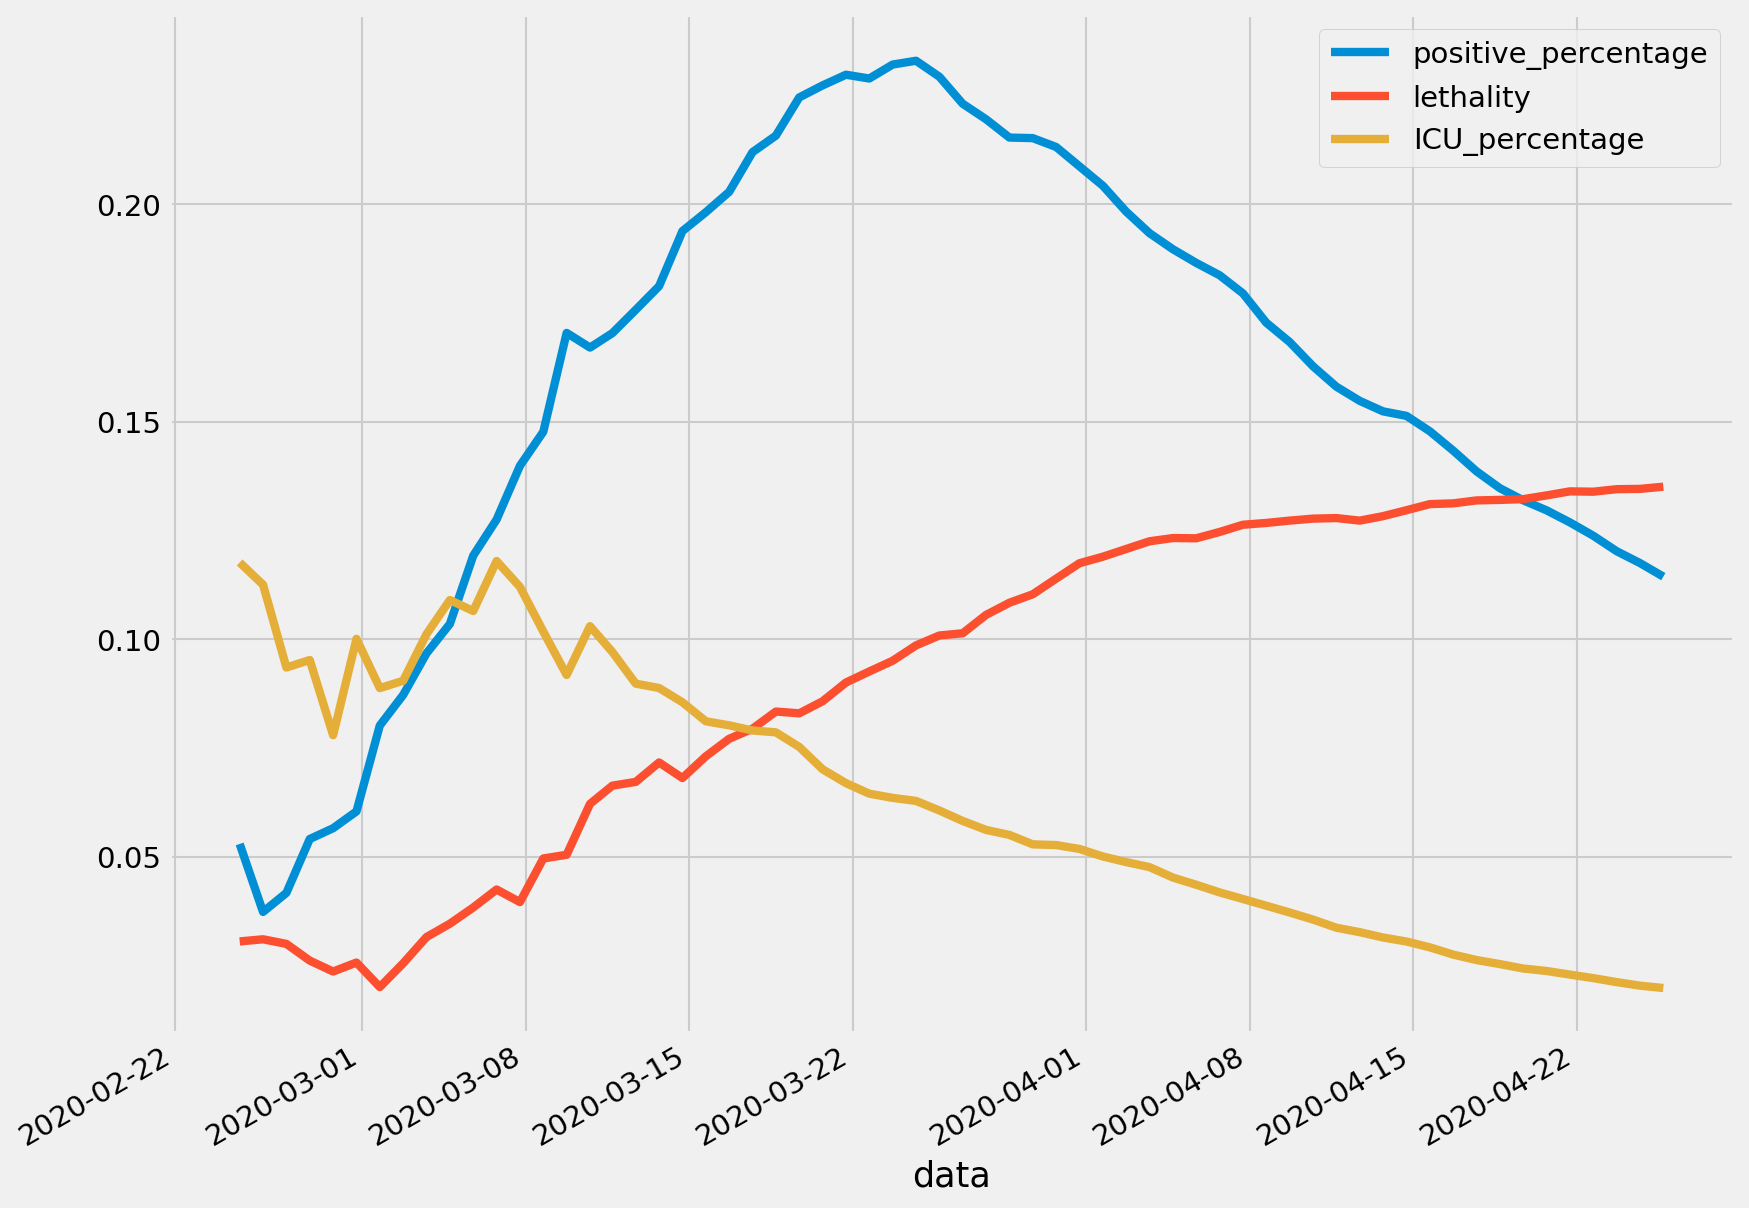

In [7]:
plt.style.use('fivethirtyeight')
_ = df.plot(x='data', y=['positive_percentage', 'lethality', 'ICU_percentage'], figsize=(12,10))